In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ZOEE.modules.configuration import importer, add_sellersparameters, parameterinterpolatorstepwise
from ZOEE.modules.variables import variable_importer, Vars, Base
from ZOEE.modules.optimization import optimization, ZOEE_optimization
#from ZOEE import update_plotstyle, moving_average
from ZOEE.modules.rk4 import rk4alg
#import matplotlib
#update_plotstyle()
#matplotlib.rcParams['lines.linewidth']=1.1

In [6]:
Lat_10,ZMT_10=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')

In [7]:
"""Decleration of optimization configuration"""
grid=np.linspace(-85,85,18)
optimization_setup = optimization(mode='Coupled',
                            target=None,
                            ZMT_response=True, 
                            GMT_response=True,
                            response_average_length=30*12,
                            num_steps=2,
                            num_data=12000,
                            gamma0=1e-8,
                            cost_function_type='LeastSquare',
                            cost_weight='cross_weight',
                            cost_ratio=None,
                            ZMT=ZMT_10+288.15,
                            GMT=288.15,
                            precision=0,
                            grid=grid)

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""
#P0=np.array([70*4.2e6,200,1.9,1.165,1.165,1.165])
#P0=Get_PGamma[0]
#Pmin=np.array([1*4.2e6,170,1.1,0.9,0.9,0.9])
#Pmax=np.array([100*4.2e6,240,2.5,1.3,1.3,1.3])
P0=np.array([200])
Pmin=np.array([170])
Pmax=np.array([240])
P_pert_ratio=1/10000
optimization_setup.give_parameters(P0,Pmin,Pmax,P_pert_ratio)
        

In [12]:
Lat_10,HadCM3_LGM_ZMT_target=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMT.csv',delimiter=',')
Lat_10,HadCM3_LGM_ZMT_target_anomaly=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMTanomaly.csv',delimiter=',')
HadCM3_LGM_GMT=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_850_1850_anomaly.txt',delimiter=',')

In [13]:
## ZMT anomaly

"""Decleration of optimization configuration"""
grid=np.linspace(-85,85,18)
optimization_setup_LGM_an = optimization(mode='Coupled',
                            target={'ZMT':HadCM3_LGM_ZMT_target_anomaly,'GMT':HadCM3_LGM_GMT[1]},
                            ZMT_response=True, 
                            GMT_response=True,
                            response_average_length=30*12,
                            num_steps=1,
                            num_data=12000,
                            gamma0=1e-8,
                            cost_function_type='LeastSquare',
                            cost_weight='cross_weight',
                            cost_ratio=None,
                            ZMT=HadCM3_LGM_ZMT_target,
                            GMT=283.15,
                            precision=0,
                            grid=grid)

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""

optimization_setup_LGM_an.give_parameters(P0,Pmin,Pmax,P_pert_ratio)
        

In [20]:
"""Import the configuration that is required to run your specific model"""

config_HadCM3_LGM=importer('Experiments/HadCM3/Config_HadCM3_LGM_fixed.ini')
parallel_config = {'number_of_parameters': 1, 'number_of_cycles': 1,'number_of_parallels': 3}
variable_importer(config_HadCM3_LGM,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_HadCM3_LGM,Sellers=add_sellersparameters(config_HadCM3_LGM, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,False)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['func3','a']]#,['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None])#,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_HadCM3_LGM = ZOEE_optimization(1,parameter_labels,parameter_levels,True,elevation,'Coupled',12000,monthly=True,progressbar=True)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""

print("Optimization >>> HadCM3 LGM target (ZMT anomaly)")
F, dF, P, Ptrans, gamma, data = optimization_setup_LGM_an.optimize(ZOEE_HadCM3_LGM,config_HadCM3_LGM)

Loading Configuration from: Experiments/HadCM3/Config_HadCM3_LGM_fixed.ini
Loading Parameters from: ZOEE/config/SellersParameterization.ini
Optimization >>> HadCM3 LGM target (ZMT anomaly)
Iteration no.0
Starting controlrun with 182500 datapoints and equilibrium condition of std(GMT[-30 years]) < 0.001 


Eq. State reached after 23825 steps, within 121.46947312355042 seconds



# LGM Tests

In [3]:
Lat_10,HadCM3_LGM_ZMT_target=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMT.csv',delimiter=',')
Lat_10,HadCM3_LGM_ZMT_target_anomaly=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMTanomaly.csv',delimiter=',')
HadCM3_LGM_GMT=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_850_1850_anomaly.txt',delimiter=',')

In [4]:

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""
P0=np.array([70*4.2e6,200,1.9,1.165,1.165,1.165])
#P0=Get_PGamma[0]
Pmin=np.array([1*4.2e6,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100*4.2e6,240,2.5,1.3,1.3,1.3])
P_pert_ratio=1/10000
        

In [5]:
## ZMT anomaly

"""Decleration of optimization configuration"""
grid=np.linspace(-85,85,18)
optimization_setup_LGM_an = optimization(mode='Coupled',
                            target={'ZMT':HadCM3_LGM_ZMT_target_anomaly,'GMT':HadCM3_LGM_GMT[1]},
                            ZMT_response=True, 
                            GMT_response=True,
                            response_average_length=30*12,
                            num_steps=20,
                            num_data=12000,
                            gamma0=1e-8,
                            cost_function_type='LeastSquare',
                            cost_weight='cross_weight',
                            cost_ratio=None,
                            ZMT=HadCM3_LGM_ZMT_target,
                            GMT=283.15,
                            precision=0,
                            grid=grid)

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""

optimization_setup_LGM_an.give_parameters(P0,Pmin,Pmax,P_pert_ratio)
        

In [6]:
"""Import the configuration that is required to run your specific model"""

config_HadCM3_LGM=importer('Experiments/HadCM3/Config_HadCM3_LGM_fixed.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_HadCM3_LGM,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_HadCM3_LGM,Sellers=add_sellersparameters(config_HadCM3_LGM, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,False)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_HadCM3_LGM = ZOEE_optimization(6,parameter_labels,parameter_levels,True,elevation,'Coupled',12000,monthly=True)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""

print("Optimization >>> HadCM3 LGM target (ZMT anomaly)")
F_HadCM3_LGM_an, dF_HadCM3_LGM_an, P_HadCM3_LGM_an, Ptrans_HadCM3_LGM_an, gamma_HadCM3_LGM_an, data_HadCM3_LGM_an = optimization_setup_LGM_an.optimize(ZOEE_HadCM3_LGM,config_HadCM3_LGM)

Loading Configuration from: Experiments/HadCM3/Config_HadCM3_LGM_fixed.ini
Loading Parameters from: ZOEE/config/SellersParameterization.ini
Optimization >>> HadCM3 LGM target (ZMT anomaly)
Iteration no.0
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


KeyboardInterrupt: 

In [27]:
np.where(np.isnan(HadCM3_LGM_GMT[1]))

(array([], dtype=int64),)

In [148]:
from ZOEE import update_plotstyle
update_plotstyle()
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1e4,10,100)
y = np.linspace(5e3,5e4,100)
z = np.linspace(5e2,1e4,100)

def cross_weight(*args):
    top = np.sum([args[j] * np.sum([args[i] for i in range(len(args)) if i != j],axis=0) 
               for j in range(len(args))],axis=0)
    #top = 2*(x*y+y*z+z*x)
    return  top / len(args) / np.sum(args,axis=0)

def nth_root_weight(*args):
    x=0
    for i in range(len(args)):
        if i==0:
            x=args[i]
        else:
            x=x*args[i]
    return x**(1/len(args))

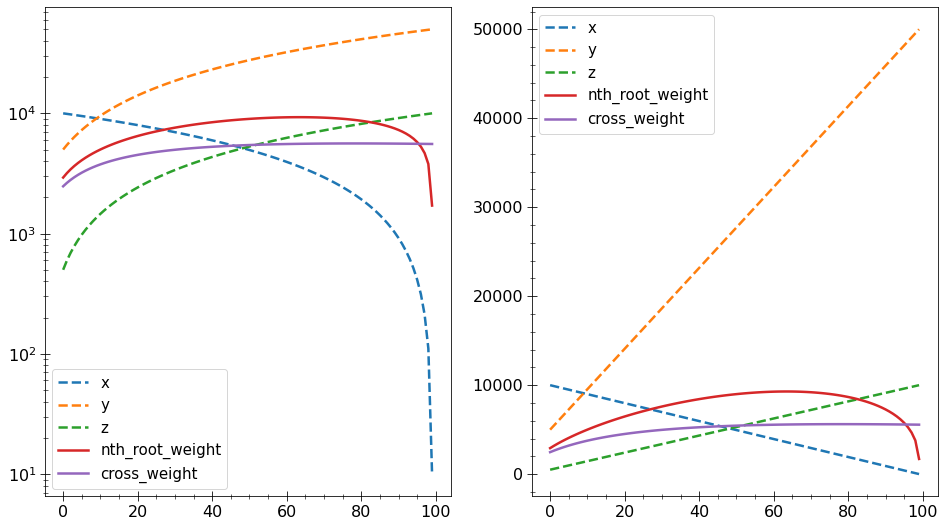

In [149]:
fig,[ax0, ax1] = plt.subplots(1,2)
ax0.plot(x,label='x',linestyle='--')
ax0.plot(y,label='y',linestyle='--')
ax0.plot(z,label='z',linestyle='--')

#plt.plot(np.mean([x,y],axis=0))
ax0.plot(nth_root_weight(x,y,z),label='nth_root_weight')
ax0.plot(cross_weight(x,y,z),label='cross_weight')
#plt.plot(np.sqrt(x*y))
ax0.set_yscale('log')
ax0.legend(fontsize=15)

ax1.plot(x,label='x',linestyle='--')
ax1.plot(y,label='y',linestyle='--')
ax1.plot(z,label='z',linestyle='--')

#plt.plot(np.mean([x,y],axis=0))
ax1.plot(nth_root_weight(x,y,z),label='nth_root_weight')
ax1.plot(cross_weight(x,y,z),label='cross_weight')
#plt.plot(np.sqrt(x*y))
ax1.legend(fontsize=15)